In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set modern style for visualizations
sns.set_theme(style="whitegrid")
%matplotlib inline

# Data Loading and EDA

In [4]:
#read CSV
df=pd.read_csv(r"credit_chart.csv", sep=';')

In [5]:
df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [6]:
#display basic info

print("Dataset Shape:", df.shape)
print("\nColumn Names:", list(df.columns))
print("\nDataset Info:")
df.info()

Dataset Shape: (1000, 21)

Column Names: ['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4  

# class balance

Creditability
1    700
0    300
Name: count, dtype: int64


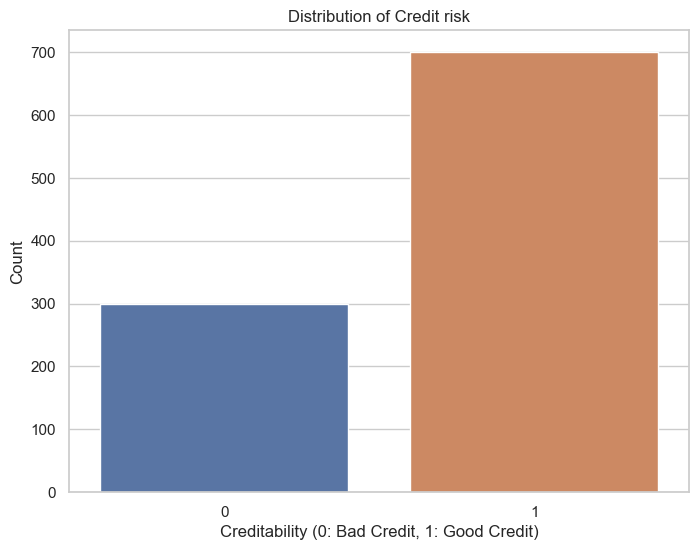

In [11]:
class_distribution = df['Creditability'].value_counts()
print(class_distribution)

#visualize
plt.figure(figsize=(8,6))
sns.countplot(df, x='Creditability')
plt.title('Distribution of Credit risk')
plt.xlabel('Creditability (0: Bad Credit, 1: Good Credit)')
plt.ylabel('Count')
plt.show()

# Numerical feature analysis

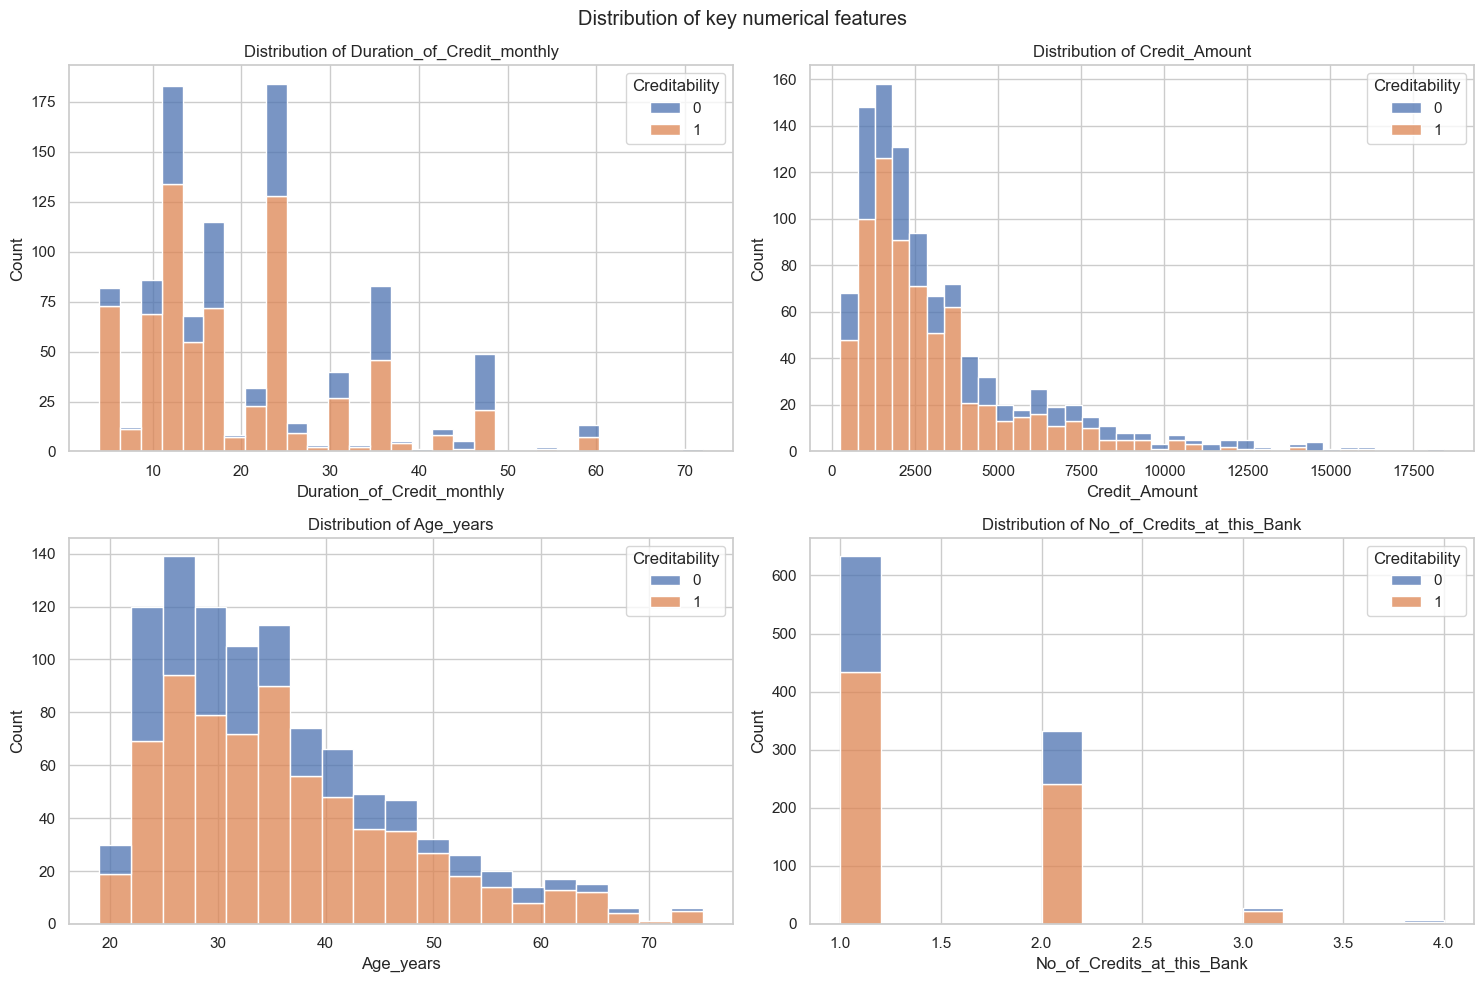

In [16]:
# select numerical columns
numerical_cols = ['Duration_of_Credit_monthly', 'Credit_Amount', 'Age_years', 'No_of_Credits_at_this_Bank']

# Create distribution plot
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Distribution of key numerical features')

for idx, col in enumerate(numerical_cols):
    row = idx//2
    col_idx= idx%2
    sns.histplot(data=df, x=col, hue='Creditability', multiple="stack", ax=axes[row, col_idx])
    axes[row,col_idx].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()
    



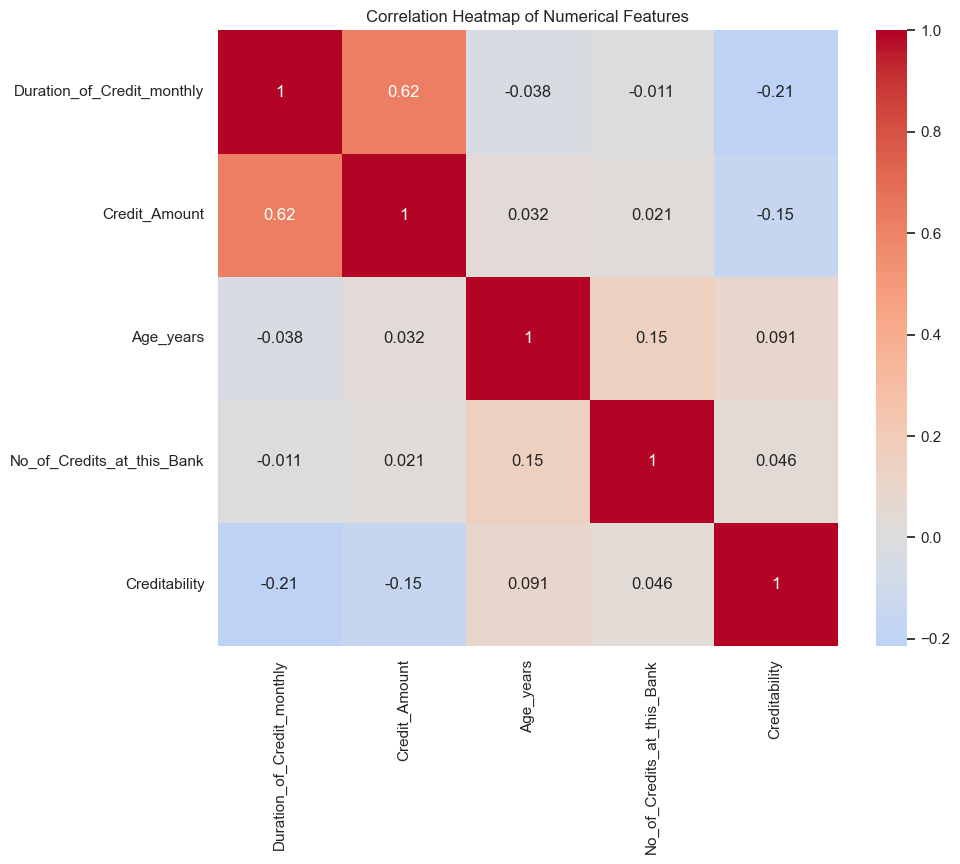

In [19]:
# create corelation matrix for numerical features
correlation_matrix=df[numerical_cols + ['Creditability']].corr()

#plt correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Categorical Features Analysis

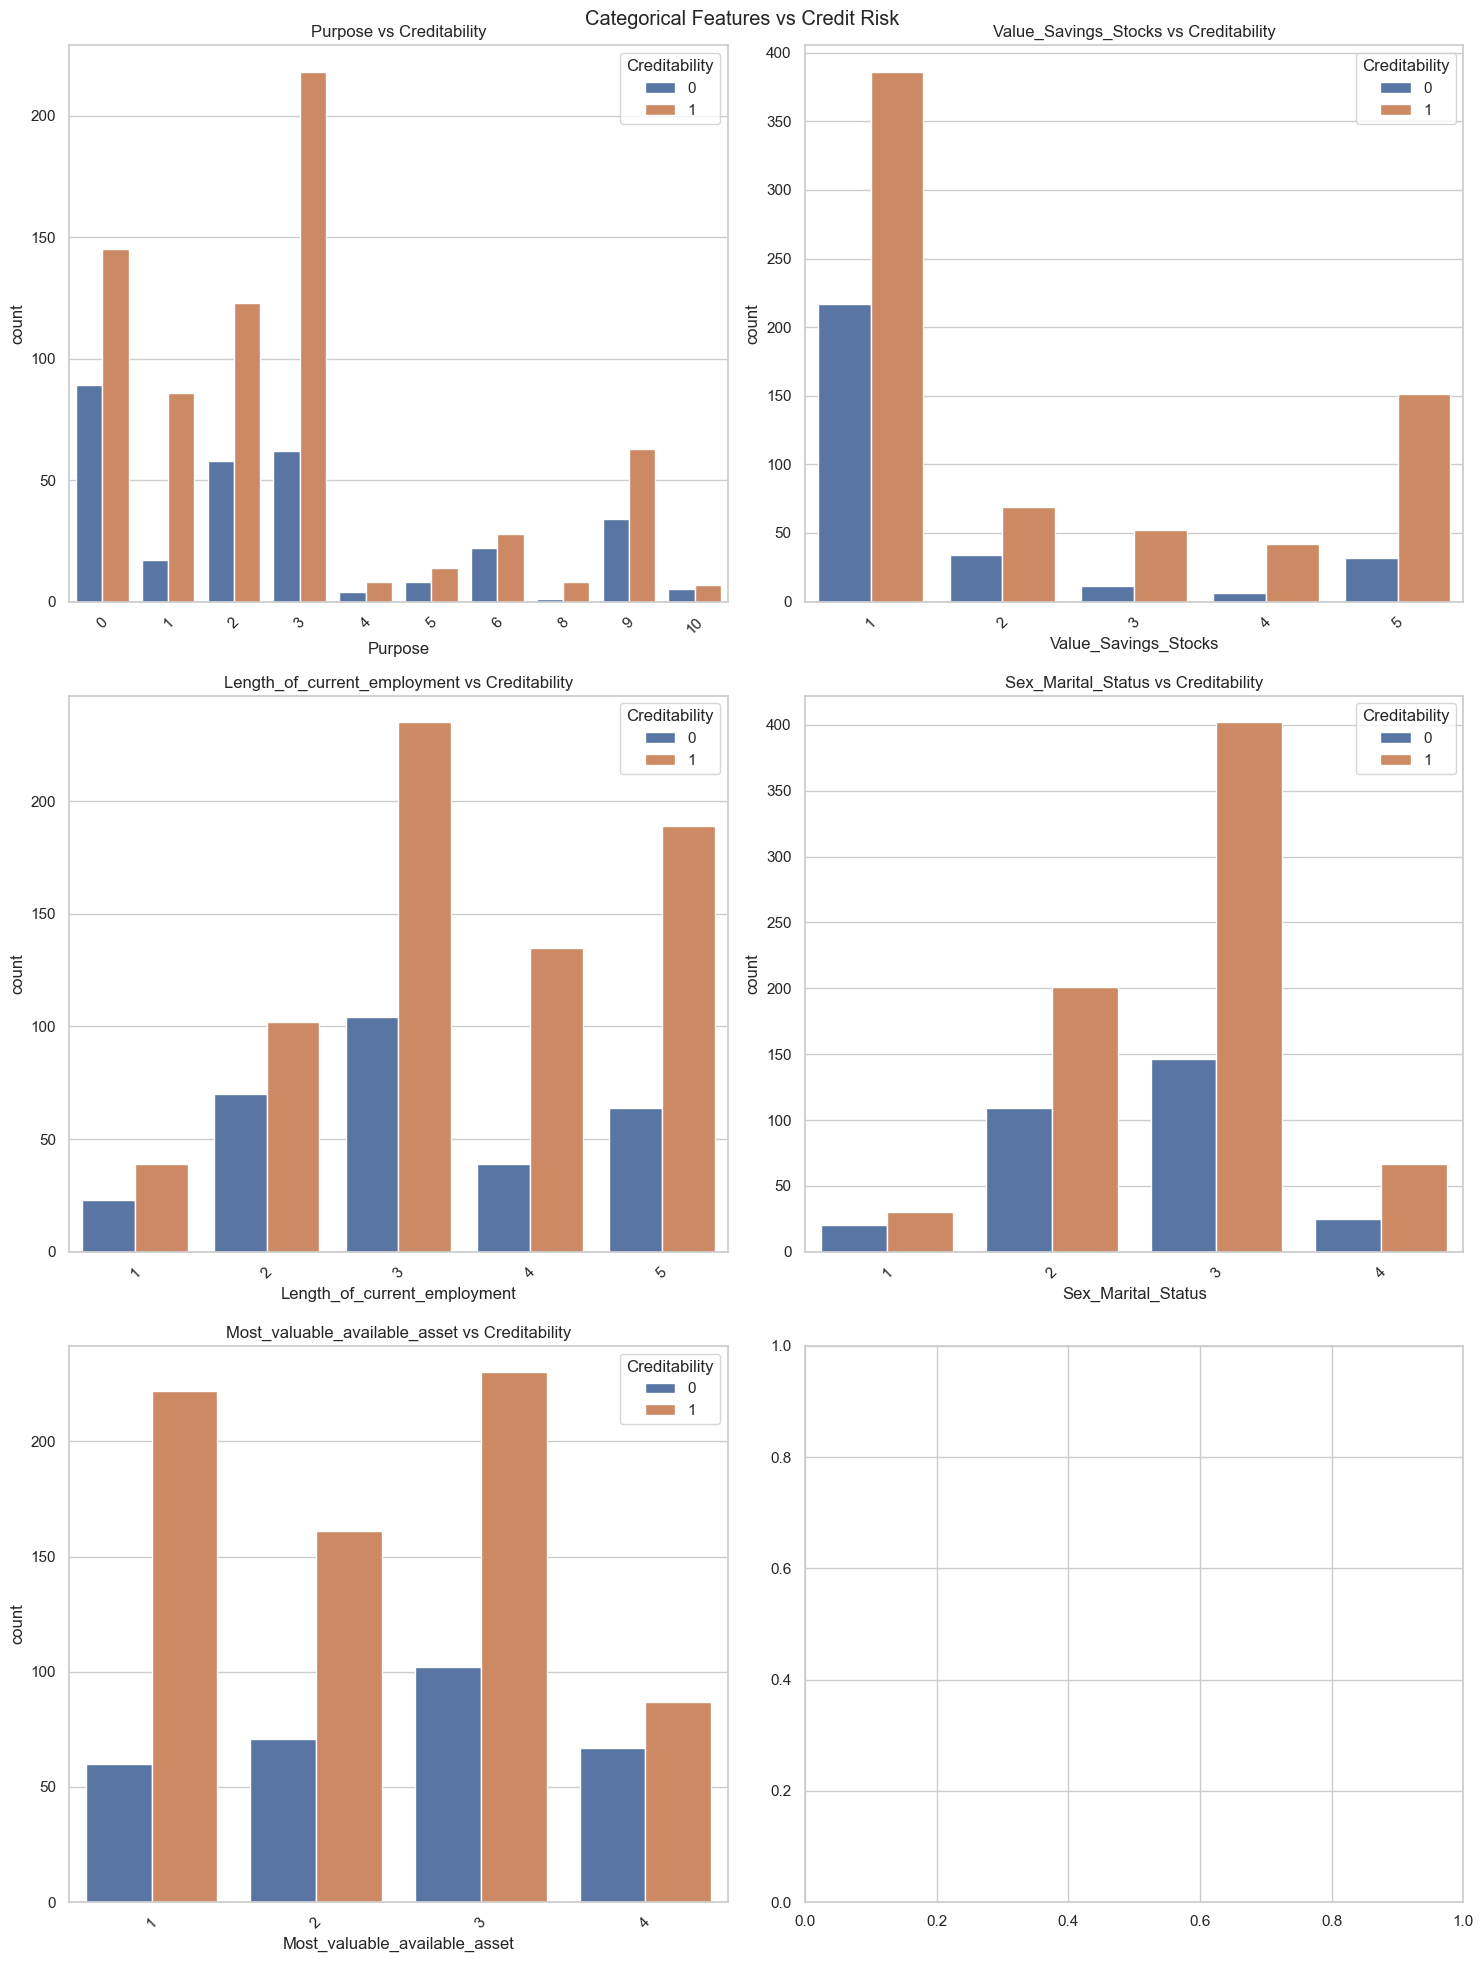

In [25]:
# select categorical columns

categorical_cols = ['Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Sex_Marital_Status', 'Most_valuable_available_asset']

# create bar plots for categorical features vs Target
fig, axes = plt.subplots(3,2, figsize=(15,20))
fig.suptitle('Categorical Features vs Credit Risk')

for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    if idx < len(categorical_cols):
        sns.countplot(data=df, x=col, hue='Creditability', ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'{col} vs Creditability')
        axes[row, col_idx].tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()
    

In [21]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [22]:
df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [26]:
df['Purpose'].value_counts()

Purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: count, dtype: int64

# Summery Statistics

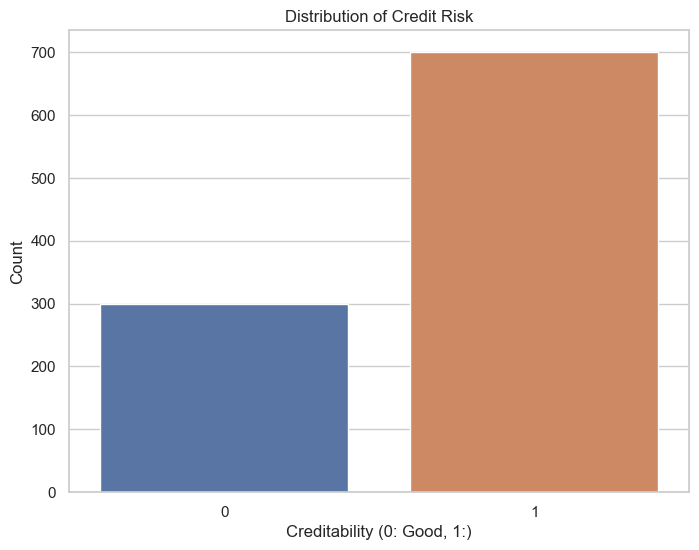


Class Distribution:
Creditability
1    70.0
0    30.0
Name: proportion, dtype: float64


In [28]:
# plot class distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Creditability')
plt.title('Distribution of Credit Risk')
plt.xlabel('Creditability (0: Good, 1:)')
plt.ylabel('Count')
plt.show()

# print class distribution percentages
class_dist = df['Creditability'].value_counts(normalize=True) * 100
print("\nClass Distribution:")
print(class_dist)


Feature Correlations with Credit Risk:
Creditability                        1.000000
Account_Balance                      0.350847
Payment_Status_of_Previous_Credit    0.228785
Value_Savings_Stocks                 0.178943
Length_of_current_employment         0.116002
Concurrent_Credits                   0.109844
Age_years                            0.091272
Sex_Marital_Status                   0.088184
Foreign_Worker                       0.082079
No_of_Credits_at_this_Bank           0.045732
Telephone                            0.036466
Guarantors                           0.025137
Type_of_apartment                    0.018119
No_of_dependents                     0.003015
Duration_in_Current_address         -0.002967
Purpose                             -0.017979
Occupation                          -0.032735
Instalment_per_cent                 -0.072404
Most_valuable_available_asset       -0.142612
Credit_Amount                       -0.154740
Duration_of_Credit_monthly          -0.21

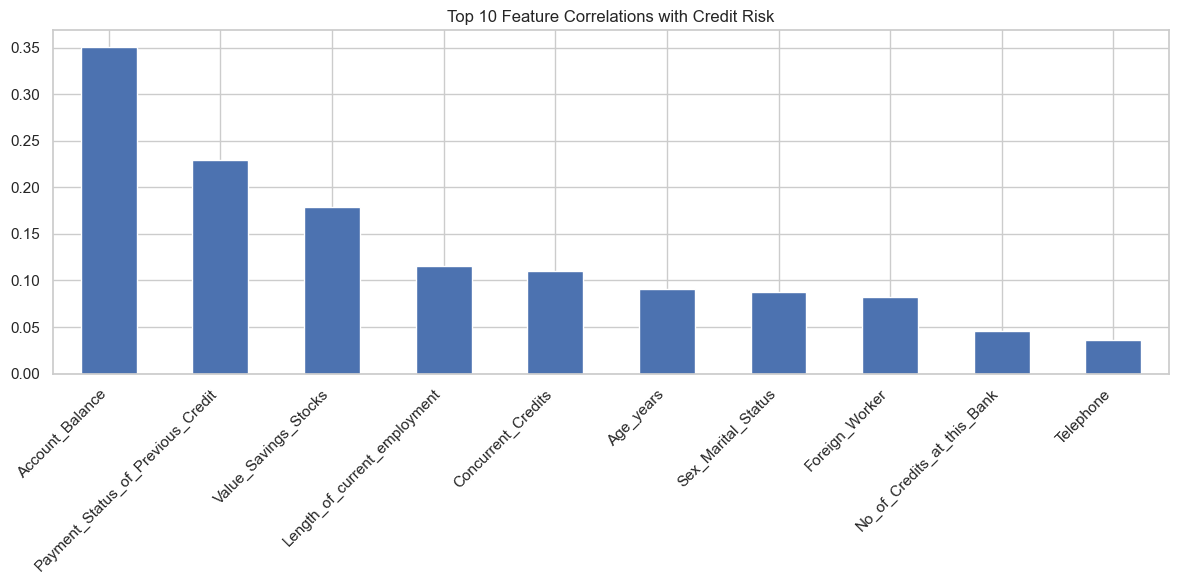

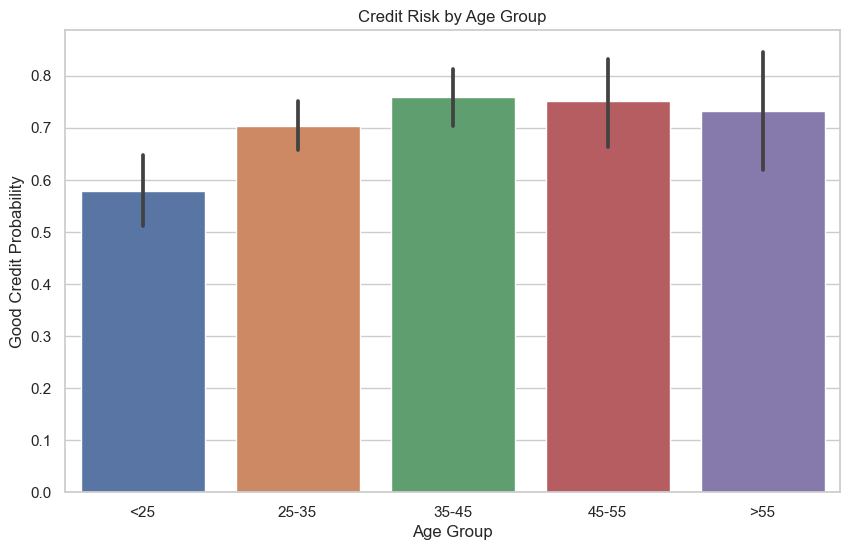

In [61]:
# Calculate feature correlations with target
correlations = df.corr()['Creditability'].sort_values(ascending=False)
print("Feature Correlations with Credit Risk:")
print(correlations)

# Plot top correlations
plt.figure(figsize=(12, 6))
correlations[1:11].plot(kind='bar')
plt.title('Top 10 Feature Correlations with Credit Risk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze risk factors by age groups
df['Age_Group'] = pd.cut(df['Age_years'], 
                        bins=[0, 25, 35, 45, 55, 100],
                        labels=['<25', '25-35', '35-45', '45-55', '>55'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='Creditability')
plt.title('Credit Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Good Credit Probability')
plt.show()

In [62]:
df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Age_Group
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,<25
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,35-45
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,<25
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,35-45
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,1,21,3,1,1,2,2,1,1,<25
996,0,1,24,2,0,2303,1,5,4,3,...,1,45,3,2,1,3,1,1,1,35-45
997,0,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,1,2,1,25-35
998,0,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,1,2,1,45-55


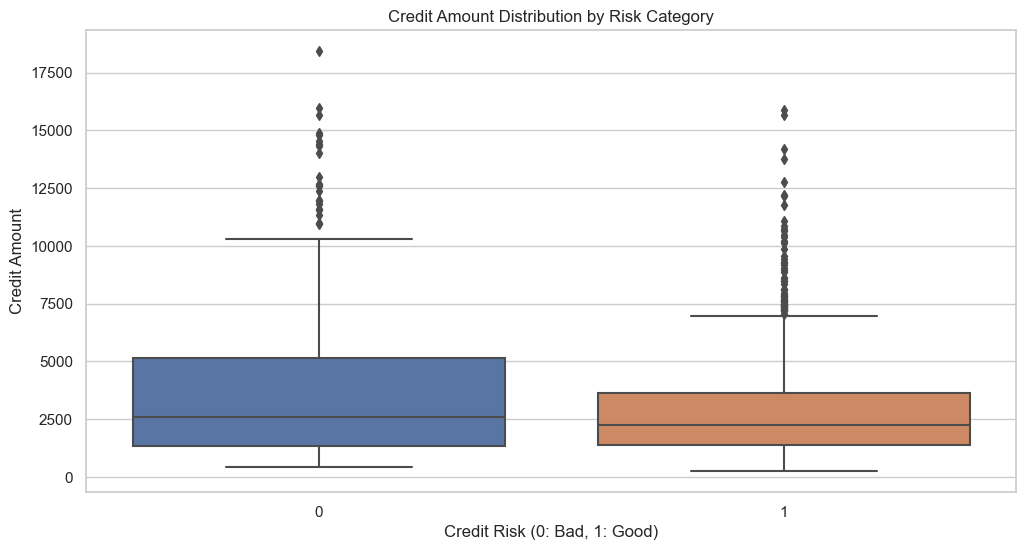

In [63]:
# Analyze credit amount distribution by risk category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Creditability', y='Credit_Amount')
plt.title('Credit Amount Distribution by Risk Category')
plt.xlabel('Credit Risk (0: Bad, 1: Good)')
plt.ylabel('Credit Amount')
plt.show()

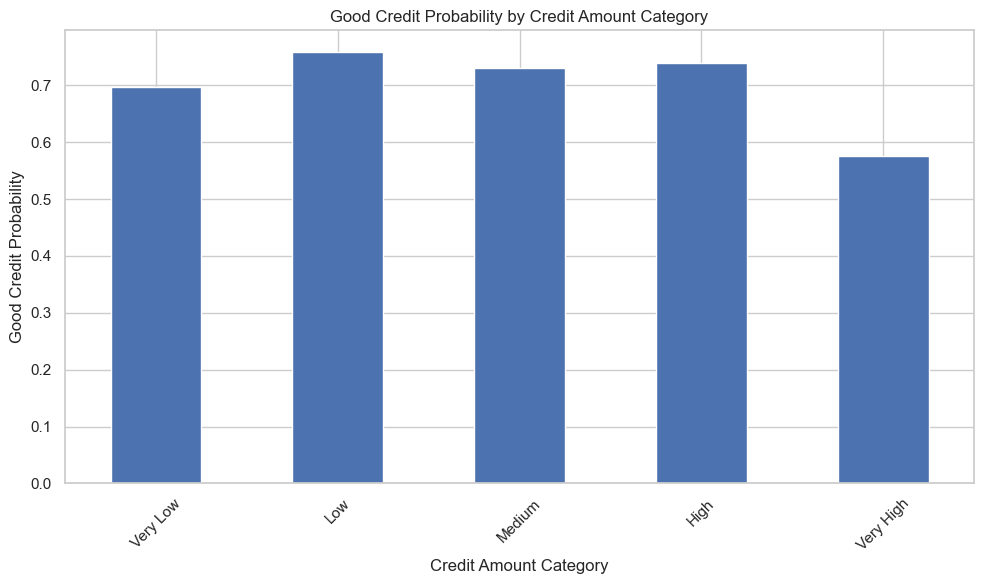

In [64]:
# Create credit amount bins and analyze risk distribution
df['Credit_Amount_Category'] = pd.qcut(df['Credit_Amount'], q=5, 
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

credit_risk_by_amount = df.groupby('Credit_Amount_Category')['Creditability'].mean()
plt.figure(figsize=(10, 6))
credit_risk_by_amount.plot(kind='bar')
plt.title('Good Credit Probability by Credit Amount Category')
plt.xlabel('Credit Amount Category')
plt.ylabel('Good Credit Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

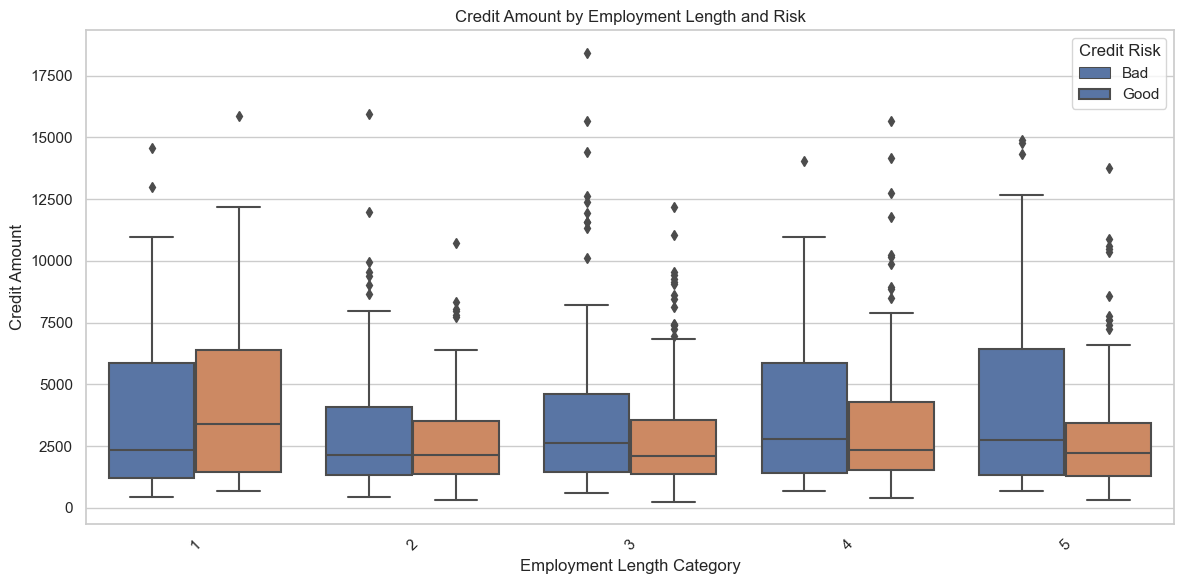


Risk Analysis by Employment Duration:
                              Good_Credit_Rate  Count
Length_of_current_employment                         
1                                     0.629032     62
2                                     0.593023    172
3                                     0.693215    339
4                                     0.775862    174
5                                     0.747036    253


In [65]:
# Analyze employment duration impact
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Length_of_current_employment', y='Credit_Amount', hue='Creditability')
plt.title('Credit Amount by Employment Length and Risk')
plt.xlabel('Employment Length Category')
plt.ylabel('Credit Amount')
plt.legend(title='Credit Risk', labels=['Bad', 'Good'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate risk rates by employment duration
emp_risk = df.groupby('Length_of_current_employment')['Creditability'].agg(['mean', 'count'])
emp_risk.columns = ['Good_Credit_Rate', 'Count']
print("\nRisk Analysis by Employment Duration:")
print(emp_risk)

# Multivariate analysis

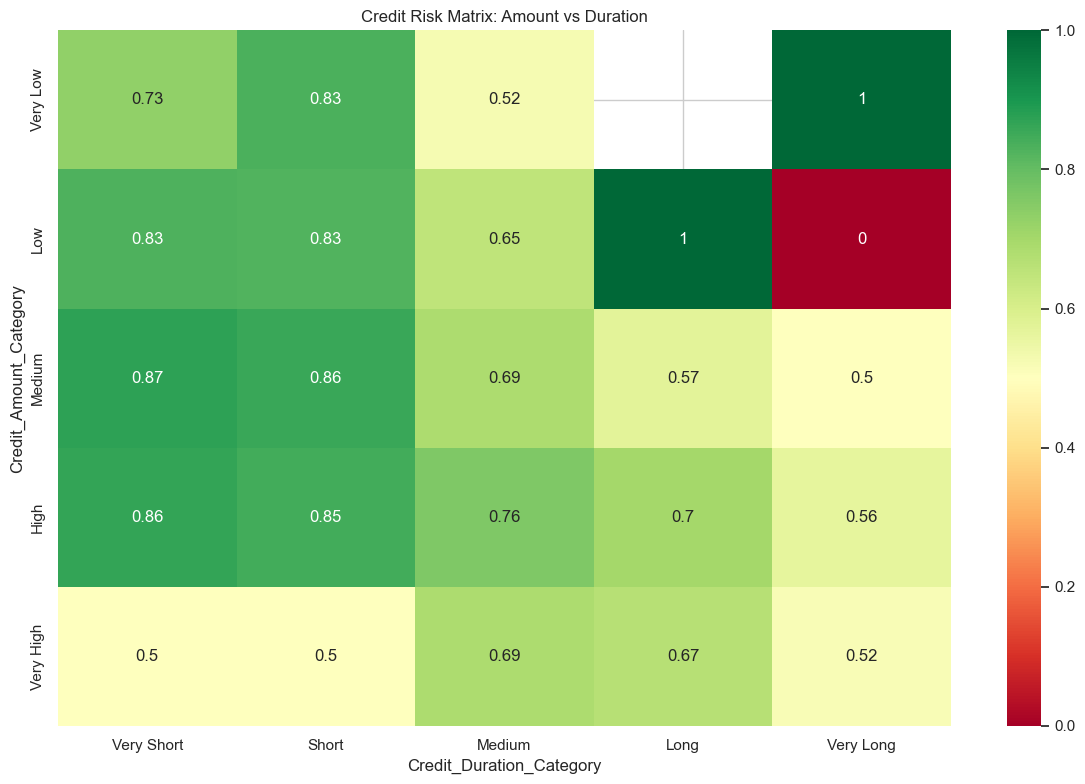

In [66]:
# Create a risk matrix of Credit Amount vs Duration
df['Credit_Duration_Category'] = pd.qcut(df['Duration_of_Credit_monthly'], q=5,
                                         labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

risk_matrix = df.pivot_table(values='Creditability', 
                            index='Credit_Amount_Category',
                            columns='Credit_Duration_Category',
                            aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(risk_matrix, annot=True, cmap='RdYlGn', center=0.5)
plt.title('Credit Risk Matrix: Amount vs Duration')
plt.tight_layout()
plt.show()

## Insights and Recommendations


Our analysis reveals that credit duration and credit amount play a critical role in assessing risk. Longer credit durations are associated with higher risk, and higher loan amounts tend to show increased risk as well—particularly when paired with extended durations. The optimal credit profile lies in medium-term loans with moderate amounts. When examining age and experience, we find that middle-aged borrowers (35–45 years) have the lowest risk profile, while younger (<25) and older (>55) borrowers tend to exhibit elevated credit risk. Moreover, employment stability proves to be a strong indicator of creditworthiness; individuals with longer employment durations tend to have lower risk and are often approved for higher loan amounts. Employment category also plays a significant role in both approval likelihood and risk levels. Using this insight, we can segment customers into risk categories: Low-risk profiles include borrowers with short-term, moderate loans and stable jobs; Medium-risk includes those with higher amounts and moderate stability; and High-risk includes long-term, high-amount borrowers with unstable employment.